In [8]:
import pandas as pd
import os
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pylab
pylab.rcParams['figure.figsize'] = (20, 10)

## Carregar dados

In [9]:
proc_path = os.path.expanduser("~/dados-ic/output/")

# Coloque aqui colunas para serem comparadas
source_list = ["modis_aqua", "modis_terra", "goes"]
source = source_list[1]

target_list = ["goes", "rad_long", "rad_xl", "tsi"]
target = target_list[3]

## -- ##

source_file = ""
if (source == "modis_aqua"):
    source_file = "modis_aqua.csv"
    col1 = "Cloud_Fraction"    
elif (source == "modis_terra"):
    source_file = "modis_terra.csv"
    col1 = "Cloud_Fraction"
elif (source == "goes"):
    col1 = "CloudFraction_VIS"
    source_file = "goes.csv"

target_file = ""
if (target == "goes"):
    target_file = "goes"
    col2 = "CloudFraction_VIS"    
elif (target == "tsi"):
    target_file = "tsi"
    col2 = "TSI_CloudFraction"    
elif (target == "rad_long"):
    target_file = "rad"
    col2 = "Long_SW_CloudFraction"    
elif (target == "rad_xl"):
    target_file = "rad"
    col2 = "XL_CloudFraction"

target_file += "-centered-"
target_file += source_file

In [10]:
source_path = os.path.join(proc_path, source_file)
target_path = os.path.join(proc_path, target_file)

data1 = pd.read_csv(source_path, na_values=["--"], parse_dates=["Time"])
data2 = pd.read_csv(target_path, na_values=["--"], parse_dates=["Time"])

## Filtrar dados

In [11]:
#col1 = "CloudFraction_VIS"
#col2 = "Long_SW_CloudFraction"
delta_col = "Delta"
filter_col = "Timedelta"

fix_delta_goes = True
delta_goes = 0.5

# Filtrar NaNs
data3 = pd.merge(data1, data2, on="Time", how="outer")
y1 = data3[col1]
y2 = data3[col2]
inds = np.isfinite(y1)
inds &= np.isfinite(y2)
data3 = data3[inds]

if (target == "goes"):
    delta_col = "Delta_x"
    if (fix_delta_goes is True):
        inds = data3["Delta_y"] == delta_goes
        data3 = data3[inds]


#Filtrar por tempo
inds = data3.Time.dt.hour >= 6 + 4
inds &= data3.Time.dt.hour <= 18 + 4
#inds = data3.Time.dt.hour == (17+4)
data3 = data3[inds]

In [12]:
timedeltas = sorted(np.unique(data3[filter_col]))
deltas = sorted(np.unique(data3[delta_col]))

qtd_deltas = len(deltas)
qtd_timedeltas = len(timedeltas)

mtr = np.zeros((qtd_timedeltas, qtd_deltas))
p_mtr = np.zeros((qtd_timedeltas, qtd_deltas))
n_mtr = np.zeros((qtd_timedeltas, qtd_deltas))

In [13]:
i = 0
j = 0

for timedelta in timedeltas:
    for delta in deltas:

        data4 = data3[data3[delta_col] == delta]
        data4 = data4[data4[filter_col] == timedelta]
        y1 = data4[col1]
        y2 = data4[col2]

        inds = np.isfinite(y2)
        inds &= np.isfinite(y1)
        #inds &= y1 < 0.99
        #inds &= y2 < 0.99

        y1 = y1[inds]
        y2 = y2[inds]
        (r, p) = st.pearsonr(y1, y2)
        mtr[i, j] = r
        n_mtr[i, j] = len(y1)
        p_mtr[i, j] = p
        #mtr[i, j] = len(y1)
        j += 1
    j = 0
    i += 1


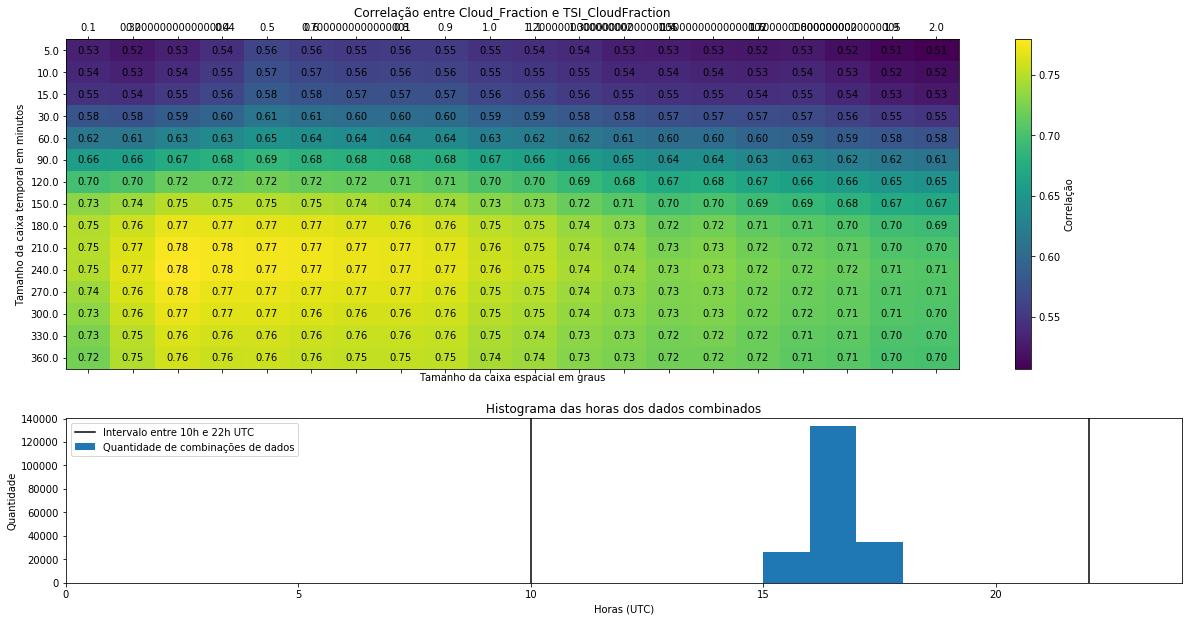

In [14]:
gs = matplotlib.gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

plot_mtr = mtr

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

mp = ax1.matshow(plot_mtr, aspect="auto")
ax1.set_xticks(np.arange(len(deltas)))
ax1.set_xticklabels(deltas)
ax1.set_yticks(np.arange(len(timedeltas)))
ax1.set_yticklabels(np.array(timedeltas) / 60)
ax1.set_xlabel("Tamanho da caixa espacial em graus")
ax1.set_ylabel("Tamanho da caixa temporal em minutos")
plt.colorbar(mp, label="Correlação", ax=ax1)
ax1.set_title("Correlação entre %s e %s" % (col1, col2))
for (i, j), z in np.ndenumerate(plot_mtr):
    ax1.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=10)
    
data3_hours = data3.Time.dt.hour
ax2.hist(data3_hours, bins=24, range=(0, 24), label="Quantidade de combinações de dados")
ax2.axvline(22, color='k', label="Intervalo entre 10h e 22h UTC")
ax2.axvline(10, color='k')
ax2.set_xlim((0, 24))
ax2.set_title("Histograma das horas dos dados combinados")
ax2.set_ylabel("Quantidade")
ax2.set_xlabel("Horas (UTC)")
ax2.legend()

plt.show()

In [617]:
np.mean(data3.Time.dt.hour) - 4

12.030814853642791

In [627]:
data3

,Cloud_Fraction,Count,Delta,Solar_Zenith,Time,TSI_CloudFraction,Timedelta,N
855,0.916314,4851,2.0,2695.498866,2013-12-23 16:49:09.077324288,1.000000,21600.0,55.0
856,0.916314,4851,2.0,2695.498866,2013-12-23 16:49:09.077324288,1.000000,19800.0,55.0
857,0.916314,4851,2.0,2695.498866,2013-12-23 16:49:09.077324288,1.000000,18000.0,55.0
858,0.916314,4851,2.0,2695.498866,2013-12-23 16:49:09.077324288,1.000000,16200.0,55.0
859,0.916314,4851,2.0,2695.498866,2013-12-23 16:49:09.077324288,1.000000,14400.0,55.0
860,0.916314,4851,2.0,2695.498866,2013-12-23 16:49:09.077324288,1.000000,12600.0,55.0
861,0.916314,4851,2.0,2695.498866,2013-12-23 16:49:09.077324288,1.000000,10800.0,55.0
862,0.916314,4851,2.0,2695.498866,2013-12-23 16:49:09.077324288,1.000000,9000.0,55.0
863,0.916314,4851,2.0,2695.498866,2013-12-23 16:49:09.077324288,1.000000,7200.0,55.0
864,0.916314,4851,2.0,2695.498866,2013-12-23 16:49:09.077324288,1.000000,5400.0,55.0
